In [871]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy as sp
import scipy.sparse as sparse

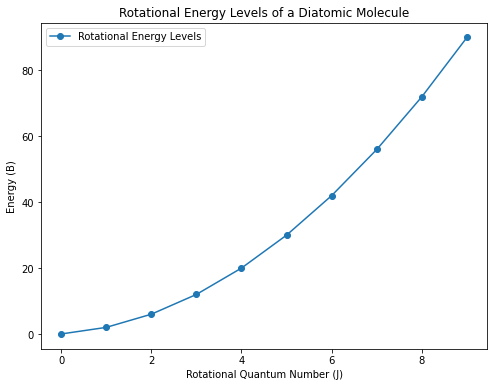

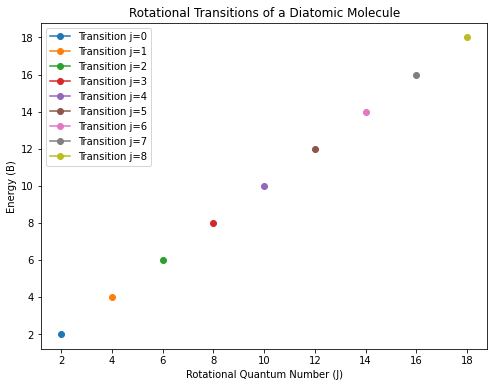

In [872]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Constants
B = 1.0  # Rotational constant (adjust as needed)

# Function to calculate energy levels
def rotational_energy(J):
    return B * J * (J + 1)

# Function to calculate transition frequencies
def transition_frequency(J_i, J_f):
    return B * (J_f * (J_f + 1) - J_i * (J_i + 1))

# Simulate rotational lines
J_values = np.arange(0, 10, 1)  # Rotational quantum numbers
energies = rotational_energy(J_values)

# Plot energy levels
plt.figure(figsize=(8, 6))
plt.plot(J_values, energies, marker='o', linestyle='-', label='Rotational Energy Levels')
plt.xlabel('Rotational Quantum Number (J)')
plt.ylabel('Energy (B)')
plt.title('Rotational Energy Levels of a Diatomic Molecule')
plt.legend()
plt.show()

# Plot rotational transitions
plt.figure(figsize=(8, 6))
for J_i in J_values[:-1]:
    J_f = J_i + 1
    freq = transition_frequency(J_i, J_f)
    plt.plot(freq, rotational_energy(J_f)-rotational_energy(J_i), marker='o', linestyle='-', label=f'Transition j={J_i}')

plt.xlabel('Rotational Quantum Number (J)')
plt.ylabel('Energy (B)')
plt.title('Rotational Transitions of a Diatomic Molecule')
plt.legend()
plt.show()


That's not too bad. That is straight from GPT with this prompt: 
I would like to make a stimulation of rotational lines in molecular spectra. Give a detailed explanation of how I might do that in python complete with coding techniques and different subjects I might need to research

With more reading in Gordy and Cook I will have better techinques, more complicated molecules and hopefully better units than $\text{Energy} (\text{B})$. 

I have read more in Gordy and Cook. I now know more about the project and more about what will be feasible and what techniques I will use. 

In [873]:
j=3
j_values = np.arange(j)
m_values = [np.arange(-j, j+1) for j in j_values]
print(f"J max is ={j}")
for index,m_range in enumerate(m_values):
    for m in m_range:
        print(f"j = {j_values[index]}, m = {m}")
# print(total[0])
# print(total[1])

J max is =3
j = 0, m = 0
j = 1, m = -1
j = 1, m = 0
j = 1, m = 1
j = 2, m = -2
j = 2, m = -1
j = 2, m = 0
j = 2, m = 1
j = 2, m = 2


According to Gordy and Cook, a rigid rotor, that is spherical, that is $$I_x=I_y=I_z=I$$ has a simple hamiltonian:
\begin{align}
    \mathscr{H}_r&=\frac{1}{2I}\left(P^2_X+P^2_Y+P^2_Z\right)\\
    &=\frac{P^2}{2I}\\
\end{align}
And thus the energy is given by:
\begin{align}
    E_j&=\langle j~m |\mathscr{H}_r|j~m \rangle\\
    &=\frac{1}{2I}\langle j~m|P^2|j~m \rangle\\
    &=\frac{\hbar^2 j (j+1)}{2I}
\end{align}
For a symmetric top rotor, that is, $$I_x=I_y$$, the energy depends on quantum number j and k:
\begin{align}
    E_{j,k}&=\frac{\hbar^2}{2}\left(\frac{j(j+1)}{I_y}+\left(\frac{1}{I_z}-\frac{1}{I_y}\right)k^2\right)
\end{align}
where $j=\{0,1,2,...\}$ and $k=\{0,1,...j\}$.\
For an asymmetric top rotor, $I_z\neq I_y \neq I_x$. This does not commute at all. We can still find the non-zero values of the elements of the Hamiltonian. The diagonal elements follow:
\begin{align}
    \langle j~k |\mathscr{H}_r|j~k \rangle&=\frac{\hbar^2}{4}\left(j(j+1)\left(\frac{1}{I_x}+\frac{1}{I_y}\right)+k^2\left(\frac{2}{I_z}-\frac{1}{I_x}-\frac{1}{I_y}\right)\right)
\end{align}
The off diagonals are two away from the diagonals, in the k axis:
\begin{align}
    \langle j~k |\mathscr{H}_r|j~k\pm2 \rangle&=\frac{\hbar^2}{8}\left(j(j+1)-k(k\pm1)\right)^{1/2}\cdot\left(j(j+1)-(k\pm1)(k\pm2)\right)^{1/2}\cdot\left(\frac{1}{I_y}-\frac{1}{I_x}\right)
\end{align}.

In [874]:
I_x=2.1
I_y=2.2
I_z=2.3
j=1
k=1
hbar = 1.0545718e-34
H_diag=(j * (j + 1) * (1/I_x + 1/I_y)+k**2 * (2/I_z - 1/I_x - 1/I_y))
H_diag*=(hbar**2 / 4)
print(f'j,k={j,k},{H_diag}')
for i in [-1,+1]:
    H_offdiag=1/I_y - 1/I_x
    H_offdiag*=(j*(j + 1)-k*(k + 1*i))**.5
    H_offdiag*=(j * (j + 1) - (k + 1*i)*(k + 2*i))**0.5
    H_offdiag*=(hbar**2 / 8)
    print(f'j,{i}k={j,k+2*i},{H_offdiag}')

j,k=(1, 1),5.005384849502573e-69
j,-1k=(1, -1),-6.017974466208006e-71
j,1k=(1, 3),(-0+0j)


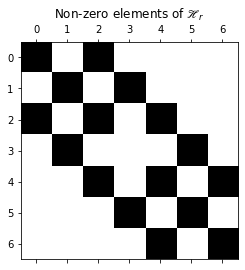

In [875]:
class matrixSolve:
    def __init__(self,j,Ix,Iy,Iz):
        self.j=j+1
        self.I=(Ix,Iy,Iz)
        self.hbar=1
    def setup(self):
        H=np.zeros((self.j,self.j))
        H=H*1j
        return H
    def diag_elem(self,index):
        (j,k)=index
        (I_x,I_y,I_z)=self.I
        H_diag=(j * (j + 1) * (1/I_x + 1/I_y)+k**2 * (2/I_z - 1/I_x - 1/I_y))
        H_diag*=(self.hbar**2 / 4)
        return H_diag
    def offdiag_elem(self,index):
        (j,k)=index
        (I_x,I_y,I_z)=self.I
        H_offdiag=1/I_y - 1/I_x
        H_offdiag*=(j*(j + 1)-k*(k+1))**.5
        H_offdiag*=(j * (j + 1) - (k+1)*(k+2))**0.5
        H_offdiag*=(self.hbar**2 / 8)
        return H_offdiag
    def populate(self):
        H=self.setup()
        for i in range(self.j):
            H[i,i]+=self.diag_elem((i,i))
            if i-2>=0:
                H[i,i-2]+=self.offdiag_elem((i,i-2))
            if i+2<self.j:
                H[i,i+2]+=self.offdiag_elem((i,i+2))
                
#             H[i-2,i]=self.offdiag_elem((i-2,i))
        return H
instance1=matrixSolve(3,2.1,2.2,2.3)
H=instance1.populate()
np.set_printoptions(edgeitems=3, infstr='inf', linewidth=130, nanstr='nan', precision=2,
                    suppress=False, threshold=1000, formatter=None)
# H=H[::-1]
# H=H.T
# H=H[::-1]
j=3
H_new=np.zeros((2*len(H)-1,2*len(H)-1))
H_new=H_new*1j
H_new[j:2*j+1,j:2*j+1]+=H
H=H[::-1]
H=H.T
H=H[::-1]
H_new[0:j+1,0:j+1]+=H[0:,0:]
H_new[4,2]=instance1.offdiag_elem((1,-1))
H_new[2,4]=instance1.offdiag_elem((-1,1))
plt.spy(H_new)
plt.title("Non-zero elements of $\mathscr{H}_r$")
plt.show()

Here we have a spy plot (for sparse matrices) of a hamiltonian for a symmetric rotor. Now we will find a sparse matrix solver and try to solve it. 

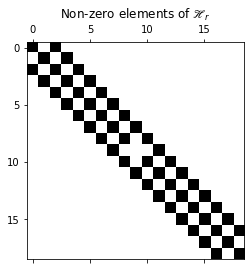

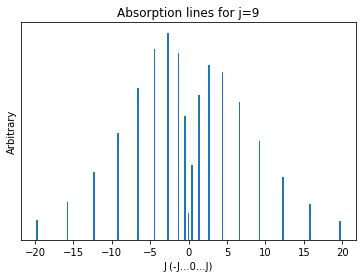

In [876]:
j=9
instance1=matrixSolve(j,2.1,2.2,2.3)
H=instance1.populate()
H_new=np.zeros((2*len(H)-1,2*len(H)-1))
H_new=H_new*1j
H_new[j:2*j+1,j:2*j+1]+=H
H=H[::-1]
H=H.T
H=H[::-1]
H_new[0:j+1,0:j+1]+=H[0:,0:]

H_new[j+1,j-1]=instance1.offdiag_elem((1,-1))
H_new[j-1,j+1]=instance1.offdiag_elem((-1,1))

values,vector=np.linalg.eigh(H_new)
# print(f'eigenvalues are:{np.abs(values)}')
# print(f'eigenvectors are :\n{vectors.T}')
x=np.real(values)

plt.spy(H_new)
plt.title("Non-zero elements of $\mathscr{H}_r$")
out_loc='Hamiltonian.png'
# plt.savefig(out_loc, dpi=400, format="png")
plt.show()
#need a way to sort the eigenvalues (maybe iteratively, j=3,j=5,j=7)
y=[(2*i+1)*np.exp(-x[i]/5) for i in range(0,2*j+1)]
x[::2]*=-1
plt.bar(x,y,.2)
plt.title(f'Absorption lines for j={j}')
plt.yticks([])
plt.ylabel('Arbitrary')
plt.xlabel('J (-J...0...J)')
out_loc='PQR_calc.png'
# plt.savefig(out_loc, dpi=400, format="png")
plt.show()

In reading the book it discusses absoprtion coefficients. I shall graph those for a given frequency, given that in the microwave region, $h\nu<<kT$. 

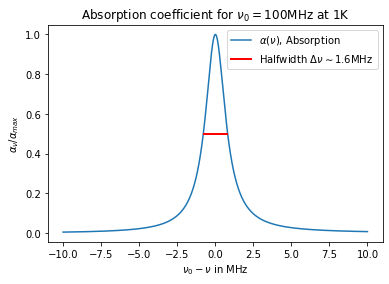

In [877]:
c=3e8
k=1.380649e-23 #J/K
T=1 #kelvin
N=100
F=.25
h=6.62607015e-34
couple=.25
prefactor=8*(np.pi**2)*N*F/(3*c*k*T)
def absorption(nu0,nu,delta):
    a=prefactor
    a*=nu**2
    a*=(1-.5*h*nu/(k*T))
    a*=couple
    a*=shape(nu0,nu,delta)
    return a
def shape(x0,x,spread):
    return spread/((x0-x)**2+spread**2)
x=np.linspace(-10,10,10000)
center=100
spread=.8
y=absorption(center,x+center,spread)
y/=np.max(y)
plt.plot(x,y,label=r'$\alpha(\nu)$, Absorption')
plt.axhline(y=.5,xmin=(.465),xmax=(.535),color='red', linestyle='-', linewidth=2,label=r'Halfwidth $\Delta\nu \sim1.6$MHz')
plt.xlabel(r'$\nu_0-\nu$ in MHz')
plt.ylabel(r'$\alpha_\nu/\alpha_{max}$')
plt.title(r'Absorption coefficient for $\nu_0=100$MHz at 1K')
out_loc='absorption_plot.png'
plt.legend()
# plt.savefig(out_loc, dpi=400, format="png")
plt.show()

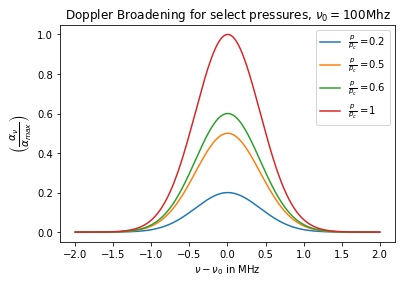

In [878]:
def dopper_broad(p,nu,nu0,width):
    a=p*(nu/nu0)**2
    a*=np.exp(-np.log(2)*((nu-nu0)/width)**2)
    return a
width=.5
p=1
x=np.linspace(-2,2,1000)
for p in [.2,.5,.6,1]:
    y=dopper_broad(p,x+100,100,width)
    plt.plot(x,y,label=r'$\frac{p}{p_c}~$'f'={p}')
plt.ylabel(r'$\left(\frac{\alpha_\nu}{\alpha_{max}}\right)$',fontsize=15)
plt.xlabel(r'$\nu-\nu_0$ in MHz')
plt.title(r'Doppler Broadening for select pressures, $\nu_0=100$Mhz')
plt.legend()
out_loc='Doppler_plot.png'
# plt.savefig(out_loc, dpi=400, format="png")
plt.show()

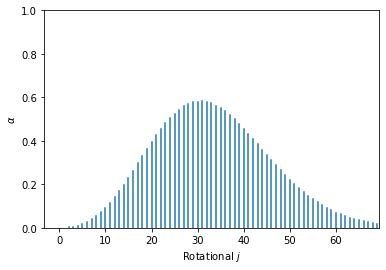

In [879]:
def rotationalOCS(j):
    prefactor=1.65e-5
    a=prefactor
    a*=(j+1)**3
    a*=1-(15e-4)*(j+1)
    a*=np.exp(-15e-4*j*(j+1))
    return a
x=np.arange(0,70,1)
y=rotationalOCS(x)
for i,yi in enumerate(y):
    plt.axvline(x=x[i],ymin=0,ymax=yi/.2)
plt.ylabel(r'$\alpha$')
plt.xlabel(r'Rotational $j$')
out_loc='Rotational_plot.png'
# plt.savefig(out_loc, dpi=400, format="png")
plt.show()
#add title?

The energy of a rigid rotor, a linear polyatomic molecule, the moment about the bond direction is zero and the moments normal to the bond angles are equal. Thus the energy is given by:
\begin{align}
E_j&=\frac{\hbar^2}{2I}j(j+1)=hBj(j+1)
\end{align}
where the rotational spectral constant,$B$, is:
\begin{align}
B&=\frac{h}{8\pi^2I}
\end{align}
The frequencies are given by: $E_j=h\nu_j$, thus $\nu_j=2B(j+1)$.
for $j=\{0,1,2,3..\}$

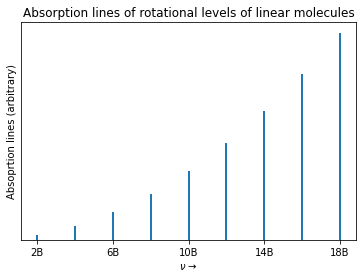

In [880]:
B=1
h=6.62607015e-34
def rigid_rotor(j,B):
    energy=h*B*j*(j+1)
    freq=2*B*(j+1)
    return freq,energy
j=np.arange(1,10)
x,y=rigid_rotor(j,1)
y=y/np.max(y)
plt.bar(x,y,.1)
plt.yticks([])
custom_x_ticks = [f'{int(2*(ji+1))}B' for ji in np.arange(0,10,2)]
custom_x_loc=2*np.arange(0,10,2)+4
plt.xticks(custom_x_loc,custom_x_ticks)
plt.xlabel(r'$\nu~\to$')
plt.ylabel(r'Absoprtion lines (arbitrary)')
plt.title('Absorption lines of rotational levels of linear molecules')
out_loc='rigid_rotor.png'
# plt.savefig(out_loc, dpi=400, format="png")
plt.show()

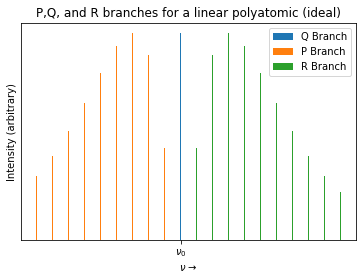

In [881]:
h=6.62607015e-34
B=1
def Qbranch(j,nu0,B=1):
    E=[nu0 for _ in j]
    return np.array(E)
def Pbranch(j,nu0,B=1):
    E=nu0
    E-=2*B*j
    return E
def Rbranch(j,nu0,B=1):
    E=nu0
    E+=2*B*(j+1)
    return E
x=[0]
y=Qbranch(x,1000)
plt.bar(y,1,.1,label='Q Branch')
j=np.arange(1,10)
x=Pbranch(-j,1000)
y=(2*(-j)+1)*np.exp(-x/5)
y=-y
y/=np.max(y)
x=Pbranch(j,1000)
plt.bar(x,y,.1,label='P Branch')
j=np.arange(0,10)
x=Rbranch(j,1000)
y=(2*j+1)*np.exp(-x/5)
y/=np.max(y)
plt.bar(x,y,.1,label='R Branch')
#~~~~~~~~~~
custom_x_ticks = [r'$\nu_0$']
custom_x_loc=[1000]
plt.xticks(custom_x_loc,custom_x_ticks)
plt.xlabel(r'$\nu~\to$')
plt.ylabel(r'Intensity (arbitrary)')
plt.title('P,Q, and R branches for a linear polyatomic (ideal)')
plt.yticks([])
plt.legend()
out_loc='PQR_ideal.png'
plt.savefig(out_loc, dpi=400, format="png")

plt.show()